# 4.0. Data Exploratory Analysis

In [202]:
# Libraries
import pandas as pd
import seaborn as sns
import warnings

from matplotlib           import pyplot as plt
from IPython.core.display import HTML

warnings.filterwarnings( 'ignore' )

In [203]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [204]:
jupyter_settings()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Populating the interactive namespace from numpy and matplotlib


In [205]:
# Load Data
data = pd.read_csv( '../Datasets/data_feature.csv' )

# Change Types
data['date'] = pd.to_datetime( data['date'] )

# Numerical Attributes
num_attributes = data.select_dtypes( include=['int64', 'float64'] )

# Categorical Attributes
cat_attributes = data.select_dtypes( include='object' )

In [206]:
data.dtypes

id                           int64
date                datetime64[ns]
price                      float64
bedrooms                     int64
bathrooms                  float64
sqft_lot                     int64
floors                     float64
waterfront                   int64
condition                    int64
sqft_basement                int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
year                         int64
year_week                   object
month                        int64
is_waterfront               object
price_level                 object
status_condition            object
renovated                   object
price/m2                   float64
road                        object
house_number                object
neighbourhood               object
postcode                    object
city                        object
state               

In [207]:
cat_attributes.head()

,year_week,is_waterfront,price_level,status_condition,renovated,road,house_number,neighbourhood,postcode,city,state
0,2014-41,no,level_one,regular,no,61st Avenue South,10012,Rainier Beach,98178,Seattle,Washington
1,2014-49,no,level_three,regular,yes,Northeast 127th Street,837,NaN,98125,Seattle,Washington
2,2015-08,no,level_one,regular,no,81st Avenue Northeast,15109,NaN,98028,NaN,Washington
3,2014-49,no,level_three,excelent,no,Fauntleroy Way Southwest,9236,NaN,98136,Seattle,Washington
4,2015-07,no,level_three,regular,no,221st Avenue Northeast,923,NaN,98074,NaN,Washington


In [208]:
# Change Types
data['date'] = pd.to_datetime( data['date'] )

## 4.1. Univariate Analysis

### 4.1.3. Response Variable

<AxesSubplot:xlabel='price'>

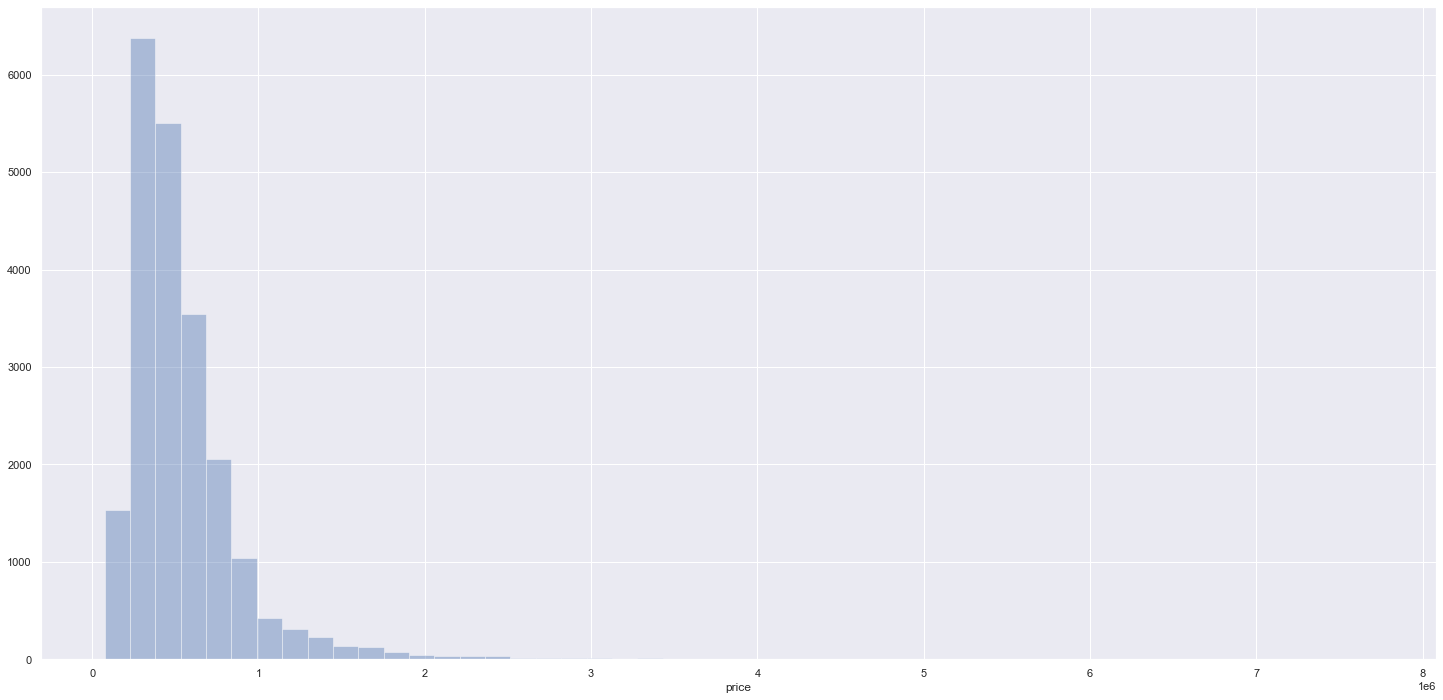

In [209]:
sns.distplot( data['price'], kde=False )

### 4.1.2. Numerical Variable

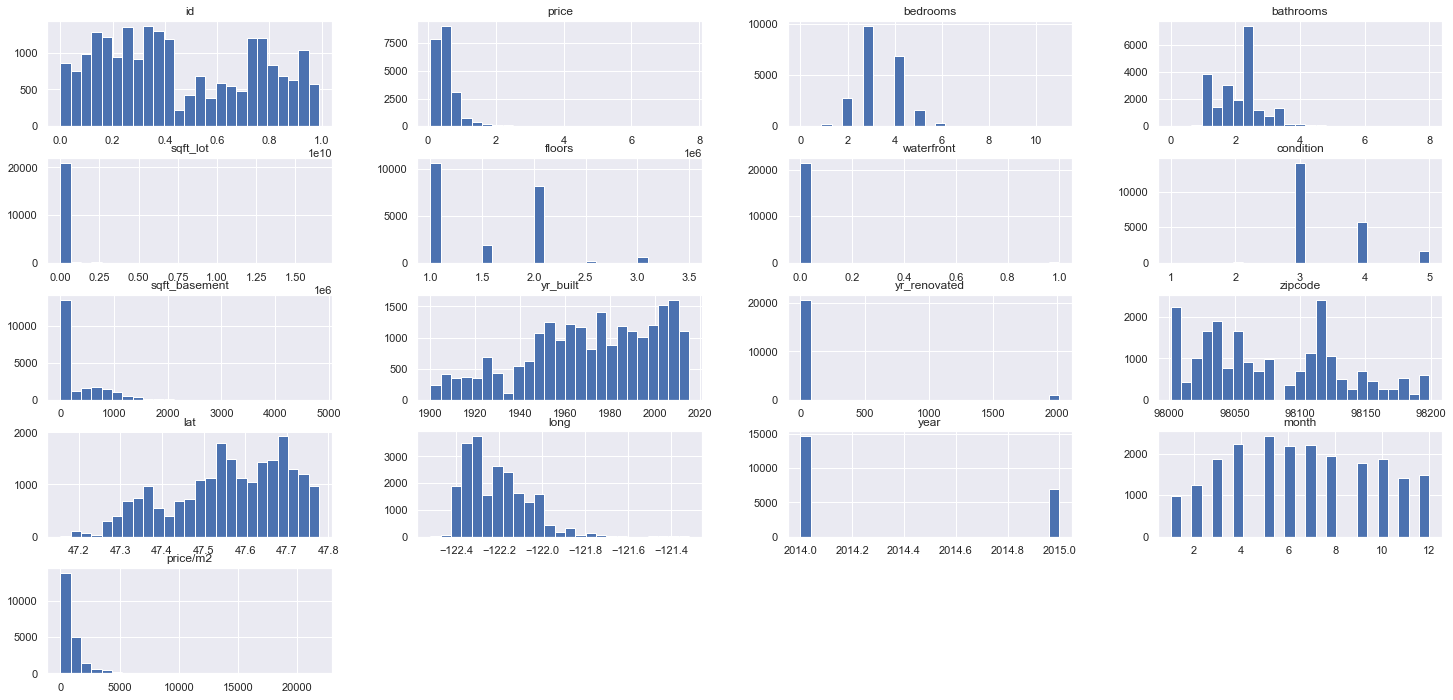

In [210]:
num_attributes.hist( bins=25 );

### 4.1.3. Categorical Variable

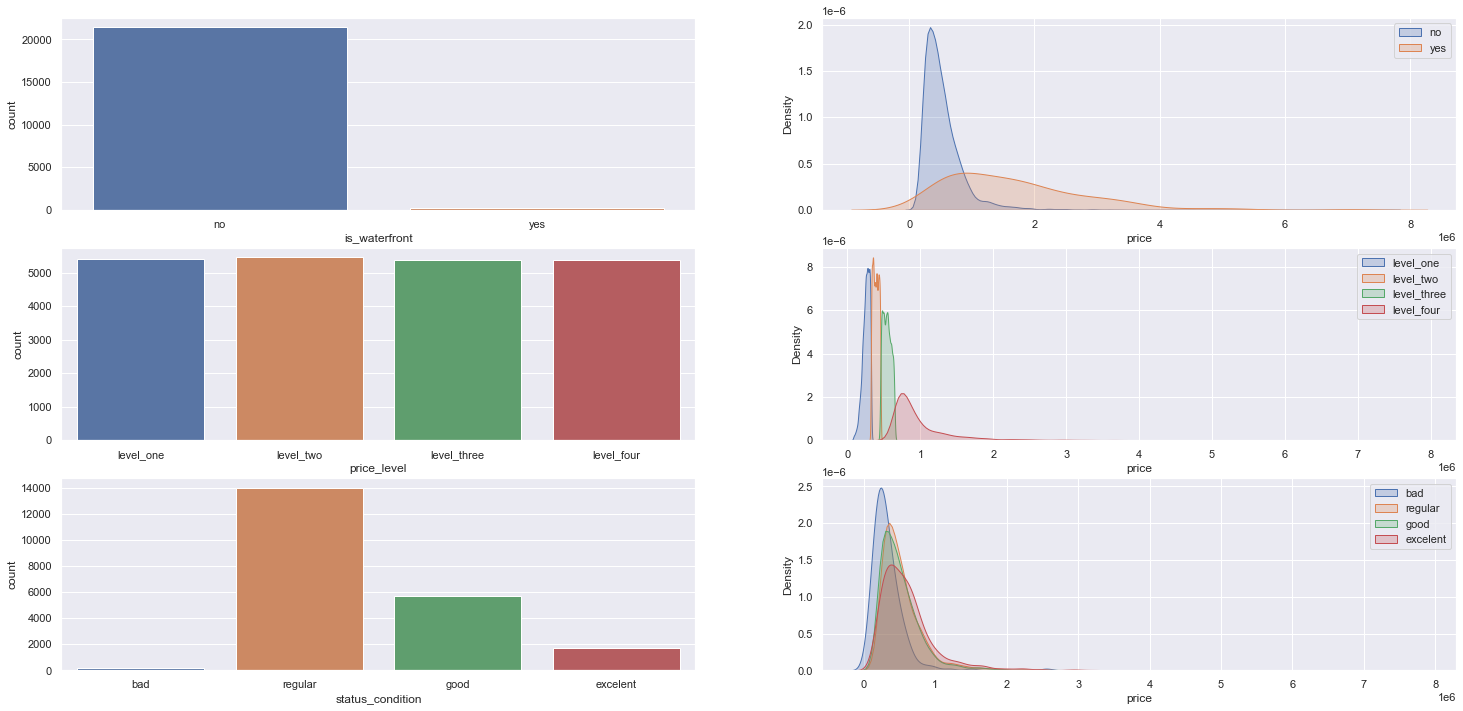

In [211]:
# waterfront
plt.subplot( 3, 2, 1 )
sns.countplot( cat_attributes['is_waterfront'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( data[data['is_waterfront'] == 'no']['price'], label='no', shade=True );
sns.kdeplot( data[data['is_waterfront'] == 'yes']['price'], label='yes', shade=True );
plt.legend();

# price level
plt.subplot( 3, 2, 3 )
sns.countplot( cat_attributes['price_level'], order=['level_one', 'level_two', 'level_three', 'level_four'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( data[data['price_level'] == 'level_one']['price'], label='level_one', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_two']['price'], label='level_two', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_three']['price'], label='level_three', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_four']['price'], label='level_four', shade=True );
plt.legend();

# status condition
plt.subplot( 3, 2, 5)
sns.countplot( cat_attributes['status_condition'], order=['bad', 'regular', 'good', 'excelent'] );

plt.subplot( 3, 2, 6 )
sns.kdeplot( data[data['status_condition'] == 'bad']['price'], label='bad', shade=True );
sns.kdeplot( data[data['status_condition'] == 'regular']['price'], label='regular', shade=True );
sns.kdeplot( data[data['status_condition'] == 'good']['price'], label='good', shade=True );
sns.kdeplot( data[data['status_condition'] == 'excelent']['price'], label='excelent', shade=True );
plt.legend();

## 4.2. Bivariate Analysis

In [301]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'year', 'year_week', 'month', 'is_waterfront',
       'price_level', 'status_condition', 'renovated', 'price/m2', 'road',
       'house_number', 'neighbourhood', 'postcode', 'city', 'state',
       'basement', 'year_month'],
      dtype='object')

In [300]:
data['year_month'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m' )

### H1: Houses with a water view are 30% more expensive, in average.
**FALSE** House with a water view are 300% more expensive, in average.

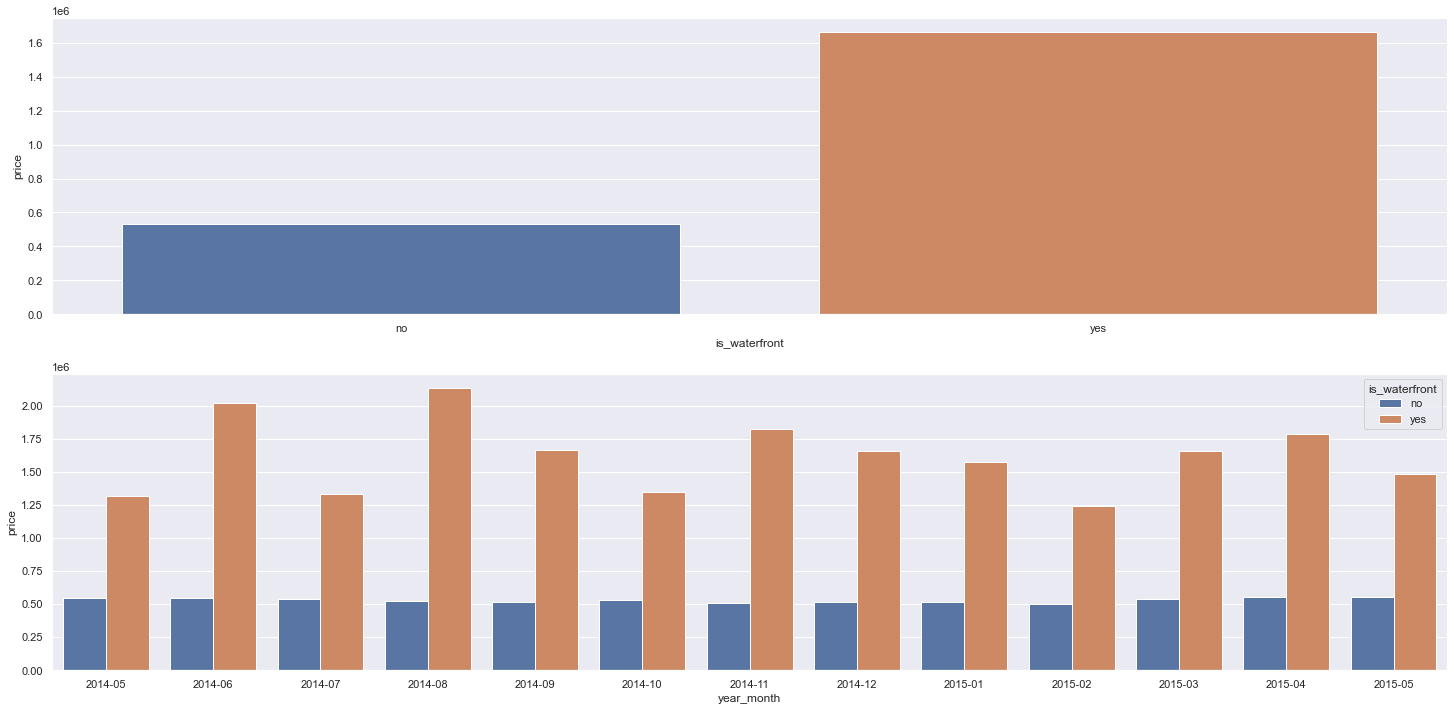

In [312]:
plt.subplot( 2, 1, 1 )
aux1 = data[['price', 'is_waterfront']].groupby( 'is_waterfront' ).mean().reset_index()
sns.barplot( x='is_waterfront', y='price', data=aux1 );

plt.subplot( 2, 1, 2 )
aux2 = data[['year_month', 'is_waterfront', 'price']].groupby( ['year_month', 'is_waterfront'] ).mean().reset_index()
#aux2.pivot( index='year_month', columns='is_waterfront', values='price' ).plot();
sns.barplot( x='year_month', y='price', hue='is_waterfront', data=aux2 );

In [313]:
aux1.loc[aux1['is_waterfront'] == 'yes' ,'price'][1] / aux1.loc[aux1['is_waterfront'] == 'no' ,'price'][0]

3.126421430830444

In [121]:
#aux2 = data[['is_waterfront', 'price/m2']].groupby( 'is_waterfront' ).mean().reset_index()
#aux2.loc[aux2['is_waterfront']=='yes', 'price/m2'][1] / aux2.loc[aux2['is_waterfront']=='no', 'price/m2'][0]


1.3750532141837855

### H2: Houses with a construction date before than 1955 are 50% cheaper, in average.
**FALSE** The construction date has a low influence on the price of the houses.

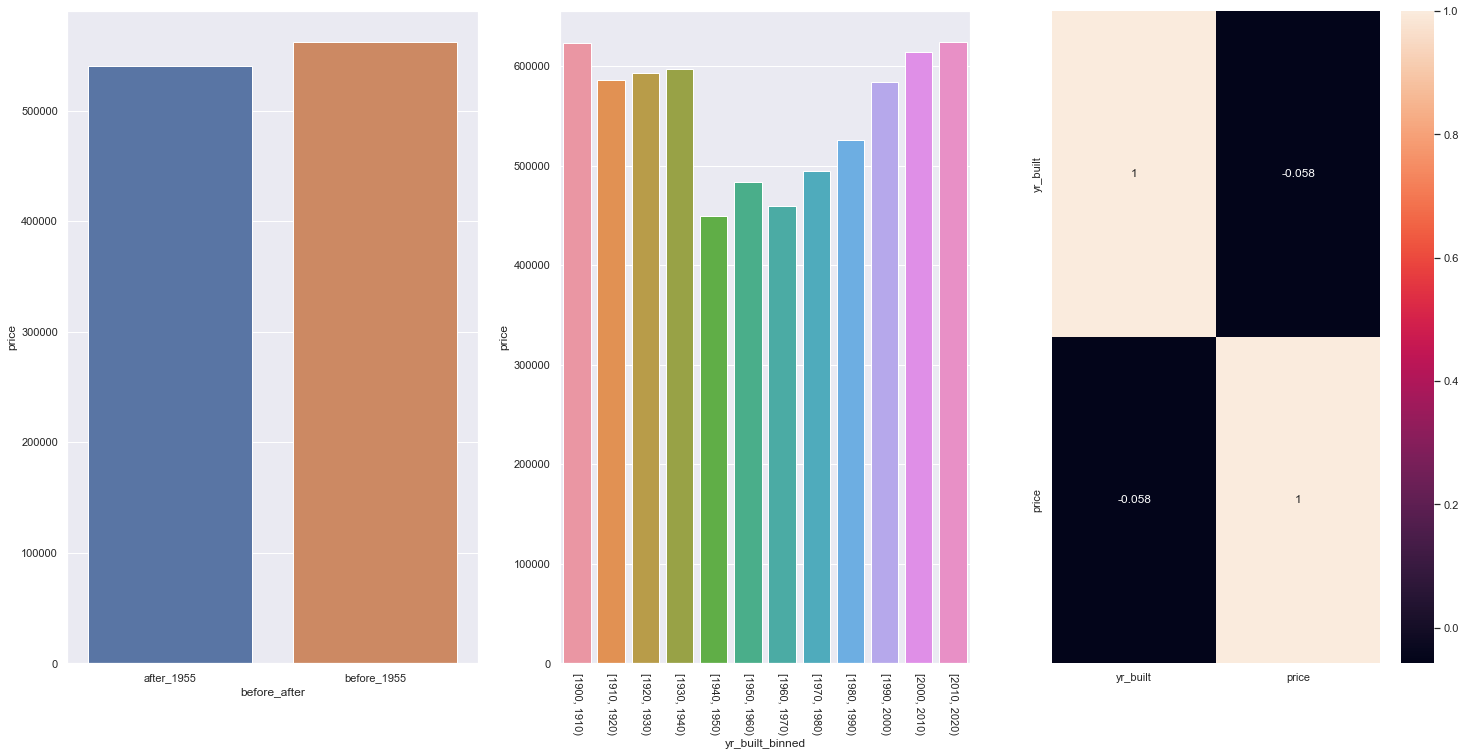

In [242]:
#plt.subplot( 1, 3, 1 )
aux1 = data[['yr_built', 'price']].groupby( 'yr_built' ).mean().reset_index()
#sns.barplot( x='yr_built', y='price', data=aux1 );
#plt.xticks( rotation=300 );

plt.subplot( 1, 3, 1 )
aux1['before_after'] = aux1['yr_built'].apply( lambda x: 'before_1955' if x <= 1955 else 'after_1955' )
aux2 = aux1[['before_after', 'price']].groupby( 'before_after' ).mean().reset_index()
sns.barplot( x='before_after', y='price', data=aux2 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 1900, 2030, 10 ) )
aux1['yr_built_binned'] = pd.cut( aux1['yr_built'], bins=bins, right=False )
aux3 = aux1[['yr_built_binned', 'price']].groupby( 'yr_built_binned' ).mean().reset_index()
sns.barplot( x='yr_built_binned', y='price', data=aux3 );
plt.xticks( rotation=270 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.savefig( '../Images/Hyphotesis2-Bivariate-Analysis.png' )

In [243]:
aux2['price'][1] / aux2['price'][0]

1.0401551558577908

### H3: Houses without a basement have a lot size 50% larger than thoses with a basement.
**FALSE** House without a basement have a lot size around 20% smaller than thoses with a basement.

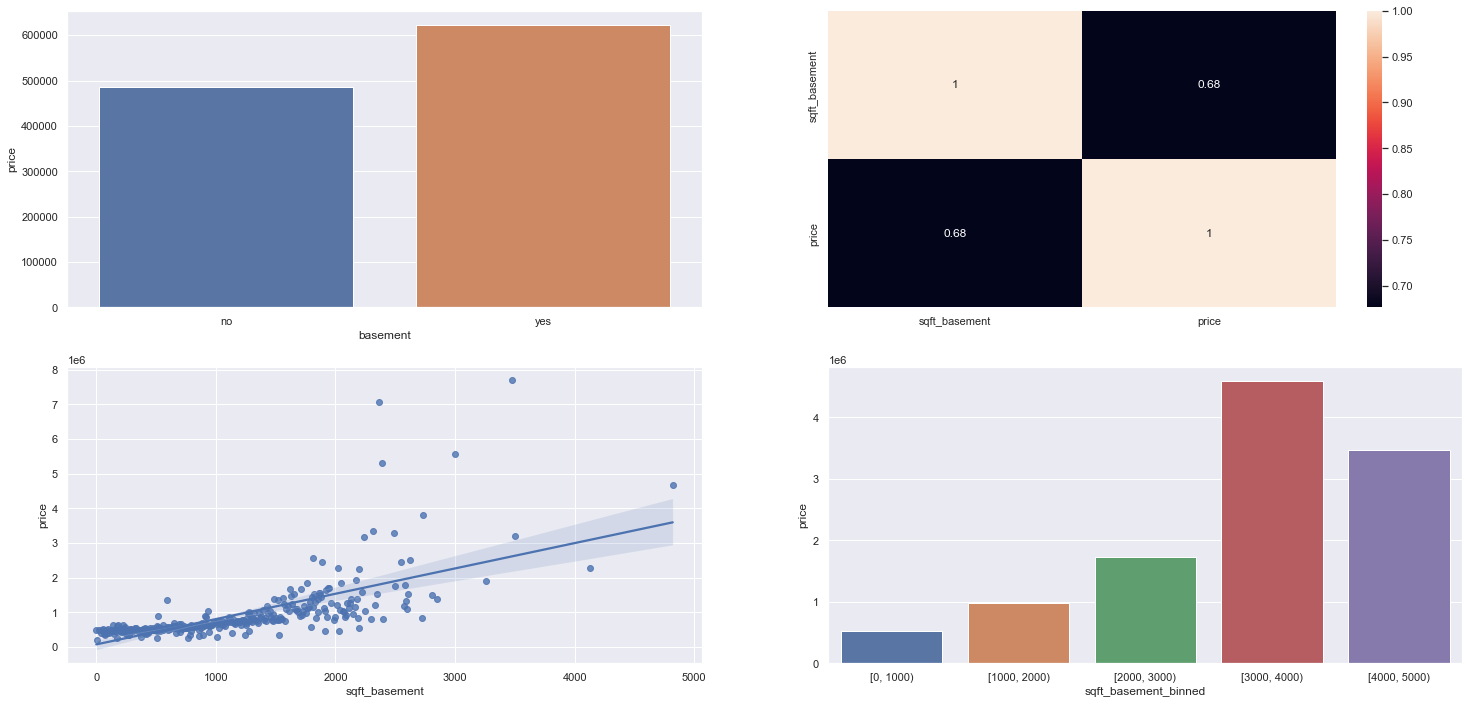

In [319]:
data['basement'] = data['sqft_basement'].apply( lambda x: 'yes' if x != 0 else 'no' )

aux1 = data[['basement', 'price']].groupby( 'basement' ).mean().reset_index()

plt.subplot( 2, 2, 1 )
sns.barplot( x='basement', y='price', data=aux1 );

plt.subplot( 2, 2, 2 )
aux2 = data[['sqft_basement', 'price']].groupby( 'sqft_basement' ).mean().reset_index()
sns.heatmap( aux2.corr( method='pearson' ), annot=True );

plt.subplot( 2, 2, 3 )
sns.regplot( x='sqft_basement', y='price', data=aux2 );

plt.subplot( 2, 2, 4 )
bins = list( np.arange( 0, 5001, 1000 ) )
aux2['sqft_basement_binned'] = pd.cut( aux2['sqft_basement'], bins=bins, right=False )
aux3 = aux2[['sqft_basement_binned', 'price']].groupby( 'sqft_basement_binned' ).mean().reset_index()
sns.barplot( x='sqft_basement_binned', y='price', data=aux3 );

In [330]:
aux1 = data[['basement', 'sqft_lot']].groupby( 'basement' ).mean().reset_index()

aux1.loc[aux1['basement'] == 'yes', 'sqft_lot'][1] / aux1.loc[aux1['basement'] == 'no', 'sqft_lot'][0]


0.8159548800113405

### H4: The YoY (Year over Year) house price growth is 10%.
**FALSE** The YoY house price growth is less than 1%.

<AxesSubplot:xlabel='year_month', ylabel='price'>

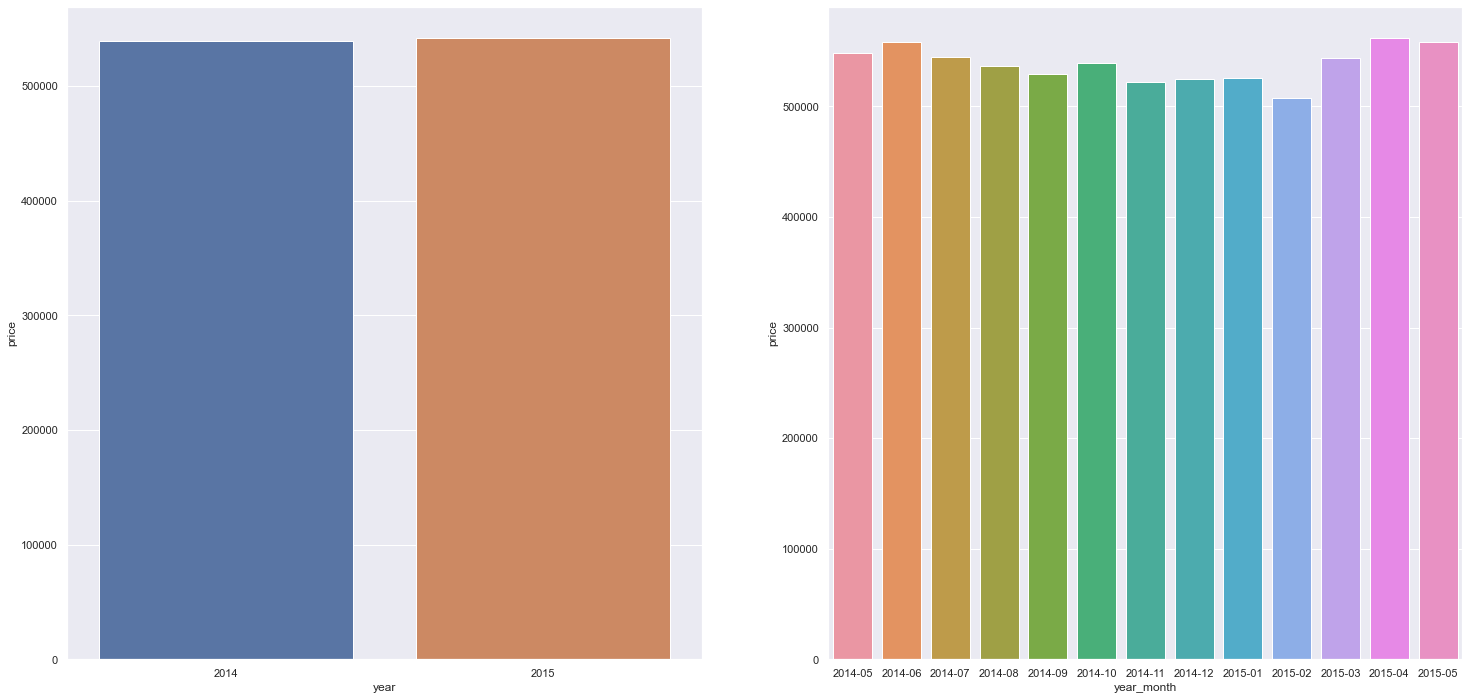

In [316]:
aux1 = data[['year', 'price']].groupby( 'year' ).mean().reset_index()

plt.subplot( 1, 2, 1 )
sns.barplot( x='year', y='price', data=aux1 )

plt.subplot( 1, 2, 2 )
aux2 = data[['year_month', 'price']].groupby( 'year_month' ).mean().reset_index()
sns.barplot( x='year_month', y='price', data=aux2 )
#sns.regplot( x='year', y='price', data=aux1 )

#plt.subplot( 1, 3, 3 )
#sns.heatmap( aux1.corr( method='pearson' ), annot=True )

In [35]:
aux1['price'][1] / aux1['price'][0]

1.0052199314488204

### H5: Houses with three bathrooms have a MoM (Month over Month) growth of 15%.
**FALSE** Number of bathrooms don't have relationship with time.

<AxesSubplot:xlabel='year_month'>

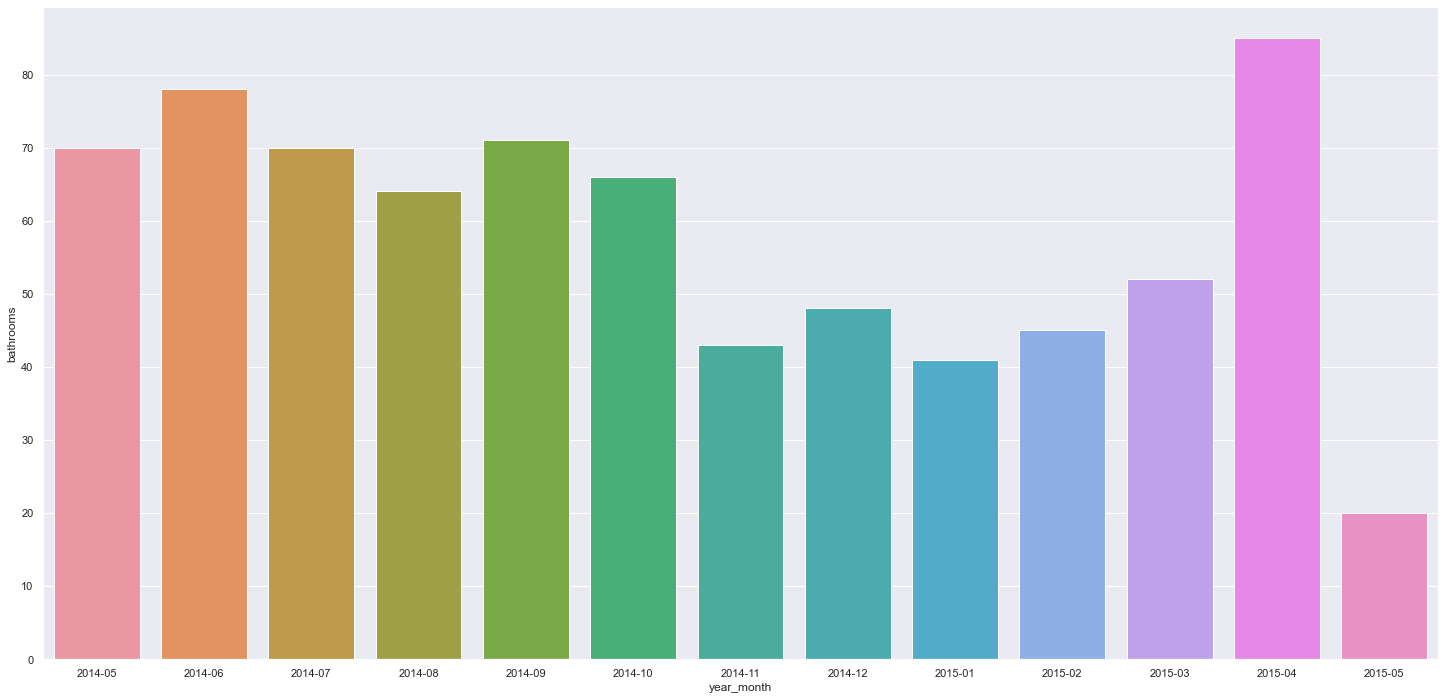

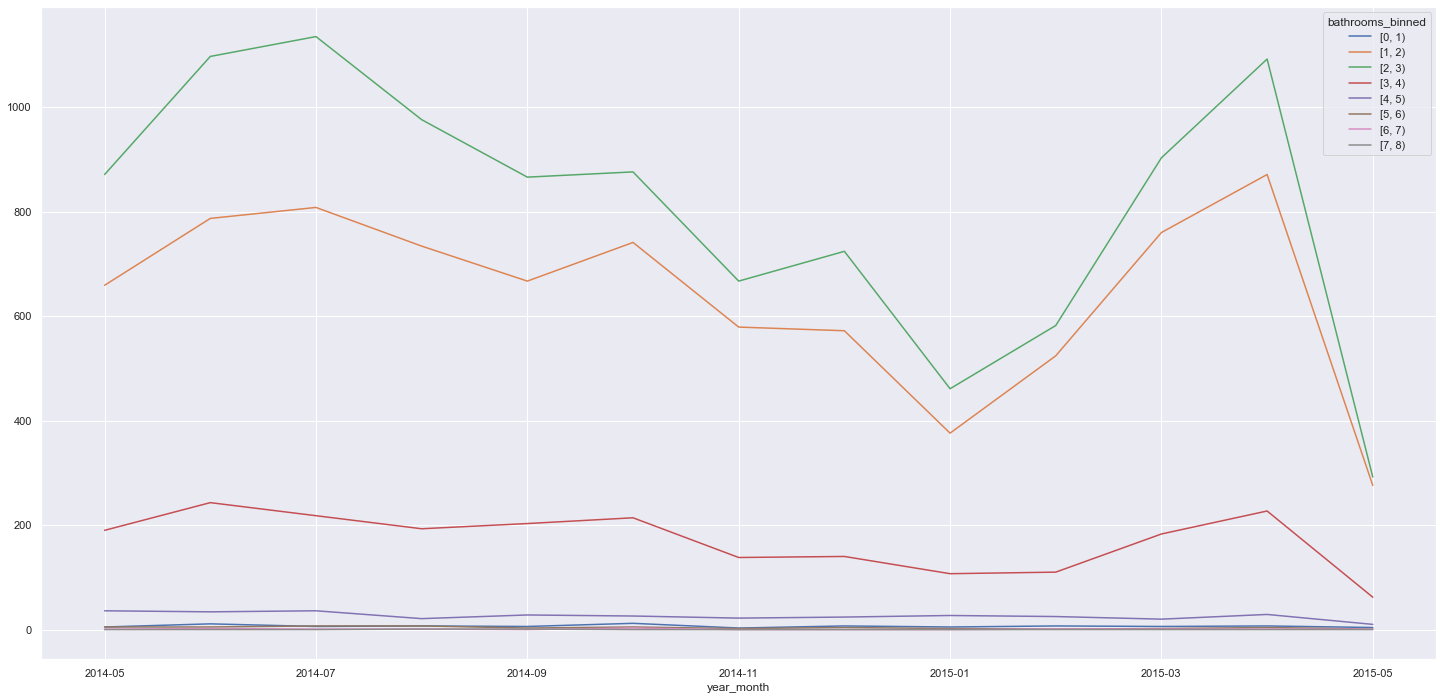

In [353]:
data['year_month'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m' )

bins = list( np.arange( 0, 9, 1 ) )
data['bathrooms_binned'] = pd.cut( data['bathrooms'], bins=bins, right=False )

aux = data[data['bathrooms'] == 3]
#aux['bathrooms'] = aux['bathrooms'].astype( int )
aux1 = aux[['bathrooms', 'year_month']].groupby( 'year_month' ).count().reset_index()

#plt.subplot( 2, 1, 1 )
sns.barplot( x='year_month', y='bathrooms', data=aux1 );
#plt.xticks( rotation=270 );

#plt.subplot( 2, 1, 2 )
aux2 = data[['year_month', 'bathrooms_binned', 'bathrooms']].groupby( ['year_month', 'bathrooms_binned'] ).count().reset_index()
#sns.barplot( x='year_month', y='bathrooms', hue='bathrooms_binned', data=aux2 );
aux2.pivot( index='year_month', columns='bathrooms_binned', values='bathrooms' ).plot()


In [341]:
data[['year_month', 'bathrooms_binned', 'bathrooms']].groupby( ['year_month', 'bathrooms_binned'] ).count().reset_index()

,year_month,bathrooms_binned,bathrooms
0,2014-05-01,"[0, 1)",5
1,2014-05-01,"[1, 2)",659
2,2014-05-01,"[2, 3)",871
3,2014-05-01,"[3, 4)",190
4,2014-05-01,"[4, 5)",36
5,2014-05-01,"[5, 6)",5
6,2014-05-01,"[6, 7)",1
7,2014-05-01,"[7, 8)",0
8,2014-06-01,"[0, 1)",11
9,2014-06-01,"[1, 2)",787


## 4.3. Multivariate Analysis

### 4.3.1. Numerical Attributes

In [107]:
correlation = num_attributes.corr( method='pearson' )
correlation['price'].sort_values( ascending=False )

price           1.00
bathrooms       0.53
bedrooms        0.32
price/m2        0.31
lat             0.31
waterfront      0.27
floors          0.26
yr_renovated    0.13
sqft_lot        0.09
yr_built        0.05
condition       0.04
Unnamed: 0      0.03
long            0.02
year            0.00
month          -0.01
id             -0.02
zipcode        -0.05
Name: price, dtype: float64

<AxesSubplot:>

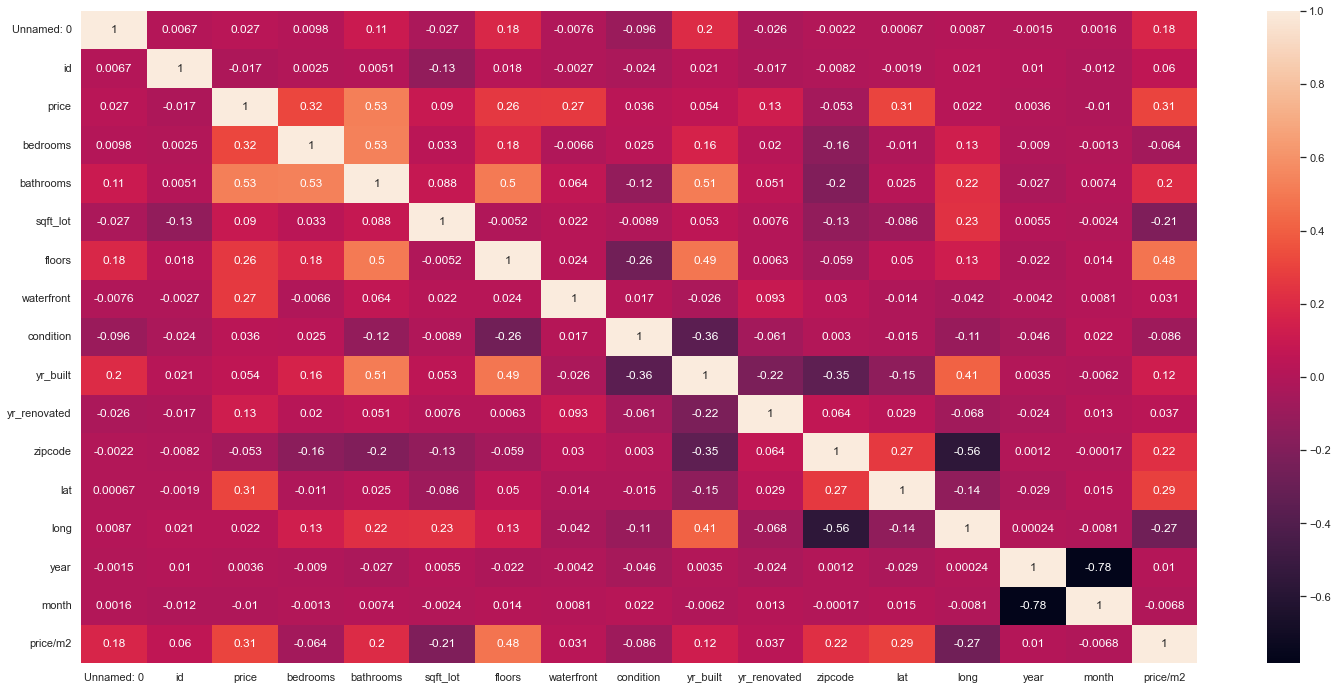

In [105]:
sns.heatmap( correlation, annot=True );

### 4.3.2. Categorical Attributes

In [109]:
cat_attributes.head()

,year_week,is_waterfront,price_level,status_condition,renovated,road,house_number,neighbourhood,postcode,city,state
0,2014-41,no,level_one,regular,no,61st Avenue South,10012,Rainier Beach,98178,Seattle,Washington
1,2014-49,no,level_three,regular,yes,Northeast 127th Street,837,NaN,98125,Seattle,Washington
2,2015-08,no,level_one,regular,no,81st Avenue Northeast,15109,NaN,98028,NaN,Washington
3,2014-49,no,level_three,excelent,no,Fauntleroy Way Southwest,9236,NaN,98136,Seattle,Washington
4,2015-07,no,level_three,regular,no,221st Avenue Northeast,923,NaN,98074,NaN,Washington


In [108]:
from scipy import stats as ss

In [180]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    k, r = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2_corr = max( 0, chi2 - ( ( k-1 )*( r-1 )/(n-1) ) )
    
    k_corr = k - ( ( k-1 )**2 )/( n-1 )
    r_corr = r - ( ( r-1 )**2 )/( n-1 )
    
    return np.sqrt( ( chi2_corr/n ) /min( k_corr-1, r_corr-1 ) )

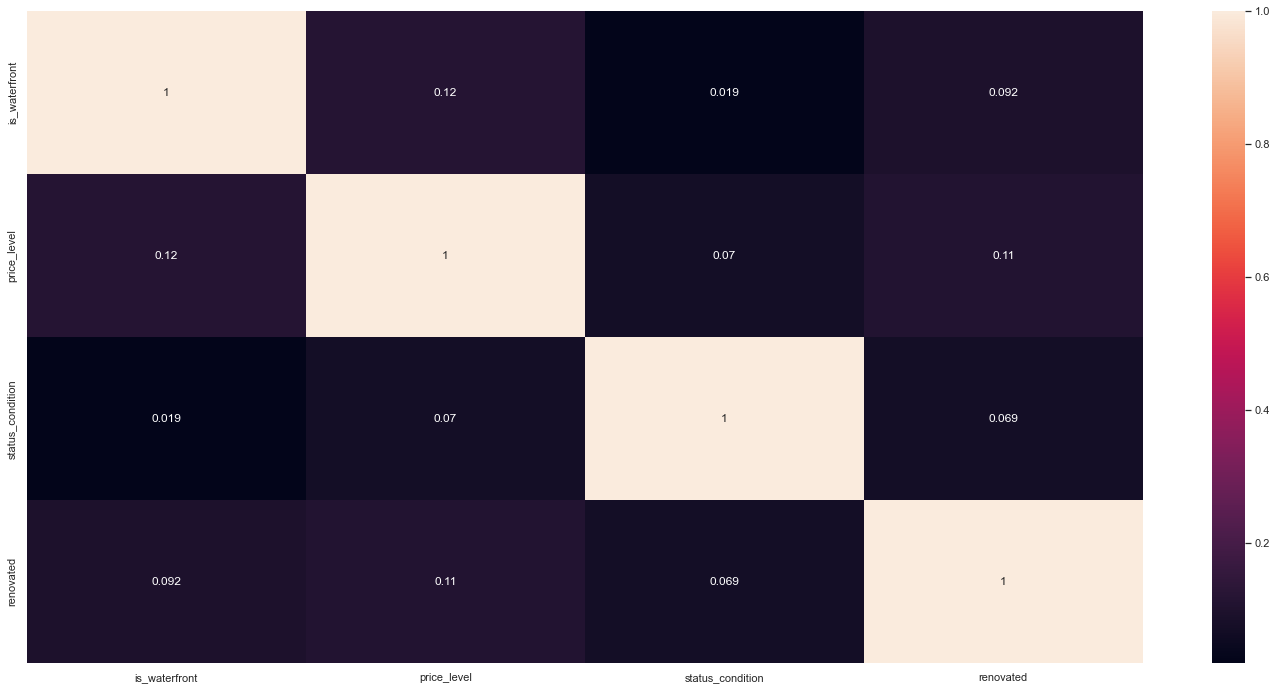

In [197]:
# is_waterfront
# price_level
# status_condition
# renovated

a1 = cramer_v( cat_attributes['is_waterfront'], cat_attributes['is_waterfront'] )
a2 = cramer_v( cat_attributes['is_waterfront'], cat_attributes['price_level'] )
a3 = cramer_v( cat_attributes['is_waterfront'], cat_attributes['status_condition'] )
a4 = cramer_v( cat_attributes['is_waterfront'], cat_attributes['renovated'] )

a5 = cramer_v( cat_attributes['price_level'], cat_attributes['is_waterfront'] )
a6 = cramer_v( cat_attributes['price_level'], cat_attributes['price_level'] )
a7 = cramer_v( cat_attributes['price_level'], cat_attributes['status_condition'] )
a8 = cramer_v( cat_attributes['price_level'], cat_attributes['renovated'] )

a9 = cramer_v( cat_attributes['status_condition'], cat_attributes['is_waterfront'] )
a10 = cramer_v( cat_attributes['status_condition'], cat_attributes['price_level'] )
a11 = cramer_v( cat_attributes['status_condition'], cat_attributes['status_condition'] )
a12 = cramer_v( cat_attributes['status_condition'], cat_attributes['renovated'] )

a13 = cramer_v( cat_attributes['renovated'], cat_attributes['is_waterfront'] )
a14 = cramer_v( cat_attributes['renovated'], cat_attributes['price_level'] )
a15 = cramer_v( cat_attributes['renovated'], cat_attributes['status_condition'] )
a16 = cramer_v( cat_attributes['renovated'], cat_attributes['renovated'] )


d = pd.DataFrame( {'is_waterfront': [a1, a2, a3, a4],
                   'price_level': [a5, a6, a7, a8], 
                   'status_condition': [a9, a10, a11, a12],
                   'renovated': [a13, a14, a15, a16]} )

d = d.set_index( d.columns )

sns.heatmap( d, annot=True );
